# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов
* Задача 5 &mdash; 30 баллов





-----

In [326]:
import numpy as np
import scipy as sc
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [46]:
data = pd.read_csv('airquality.csv')

Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [45]:
data[['Ozone','Solar.R', 'Wind','Temp']].describe().round(2)

,Ozone,Solar.R,Wind,Temp
count,116.00,146.00,153.00,153.00
mean,42.13,185.93,9.96,77.88
std,32.99,90.06,3.52,9.47
min,1.00,7.00,1.70,56.00
25%,18.00,115.75,7.40,72.00
50%,31.50,205.00,9.70,79.00
75%,63.25,258.75,11.50,85.00
max,168.00,334.00,20.70,97.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Везде есть выбросы

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

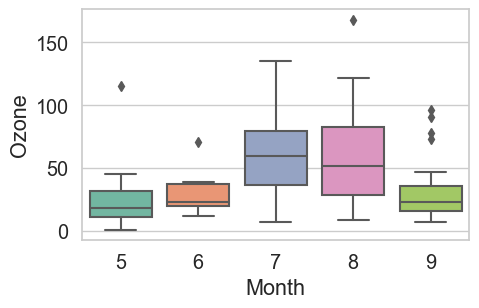

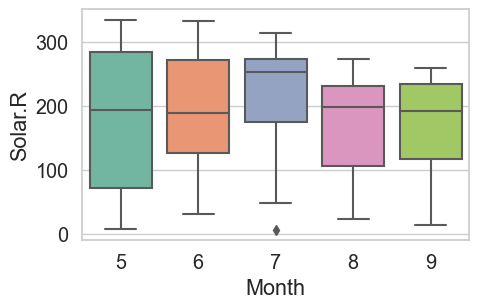

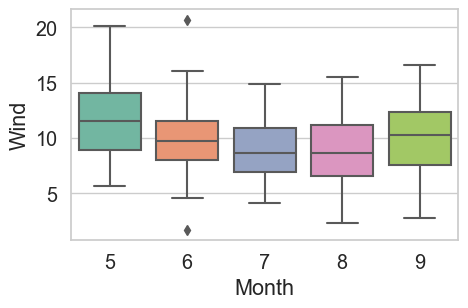

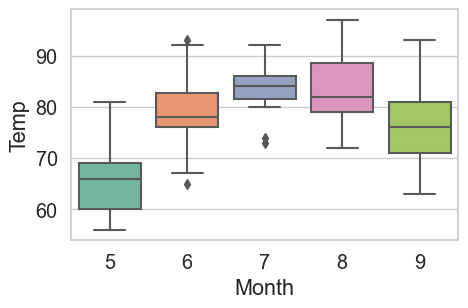

In [47]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data, x='Month', y='Ozone')
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data, x='Month', y='Solar.R')
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data, x='Month', y='Wind')
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data, x='Month', y='Temp')
    

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** $\newline$
пусть U(alpha) - выборочный альфа-квантиль, mu - выборочная медиана.$\newline$
Тогда верхний и нижний ус определяются так: U(1/4)-1.5*(U(3/4)-U(1/4)) и U(3/4)+1.5*(U(3/4)-U(1/4))$\newline$
 m - средняя линия$\newline$
U(1/4), u(3/4) - нижняя и верхняя граница бокса$\newline$
В данном случае видно, в Solar.R в 7 месяце выброс, в Wind - в 6, в Temp - в 6 и 7, Ozone 5, 6,8,9

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [50]:
print(data[['Ozone']].mean());
print(data[['Ozone']].median());

Ozone    42.12931
dtype: float64
Ozone    31.5
dtype: float64


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** среднее сильно зависит от выбросов, а медиана - нет

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Насчет ветра и тепла зависимы. Если в 3х месяцах подряд температура была порядка +30, то мы с хорошей точностью можем гарантировать, что в следующем не будет -30, а опять порядка предыдущих.$\newline$
А вот радиация зависит от солнечной активности, которая +- рандомная.

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** нет, не часто. Корреляцию посчитать.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** боксплот удобен для обнаружения выбросов

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [275]:
data = pd.read_csv('wine.data', names = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',\
                                            'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',\
                                            'Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
data = data[data.Type == 1]
data = data[['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins','Hue']]

In [263]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    s2 = np.var(sample)
    
    left   = sample.mean() - sps.norm(loc=sample.mean(), scale=np.sqrt(s2)).ppf(alpha)/np.sqrt(sample.shape[0])*np.sqrt(s2)
    right  = sample.mean() + sps.norm(loc=sample.mean(), scale=np.sqrt(s2)).ppf(alpha)/np.sqrt(sample.shape[0])*np.sqrt(s2)
    return np.array([left, right])

def calculate_confidence_intervals(sample, alpha=0.95):
    s2 = np.var(sample)
    left   = sample.mean() - sps.t.ppf(alpha,sample.shape[0]-1, loc = sample.mean(), scale = np.sqrt(s2))/np.sqrt(sample.shape[0]-1)*np.sqrt(s2)
    right  = sample.mean() + sps.t.ppf(alpha,sample.shape[0]-1, loc = sample.mean(), scale = np.sqrt(s2))/np.sqrt(sample.shape[0]-1)*np.sqrt(s2)
    return np.array([left, right])

print(calculate_asymptotic_confidence_intervals(data['Alcalinity of ash']))
print(calculate_confidence_intervals(data['Alcalinity of ash']))

In [274]:
pd.DataFrame({'parameters': ['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins','Hue'],\
              'АДИ': [calculate_asymptotic_confidence_intervals(data['Alcalinity of ash']).round(2),\
                      calculate_asymptotic_confidence_intervals(data['Nonflavanoid phenols']).round(2),\
                      calculate_asymptotic_confidence_intervals(data['Proanthocyanins']).round(2),\
                      calculate_asymptotic_confidence_intervals(data['Hue']).round(2)],\
              'ТДИ': [calculate_confidence_intervals(data['Alcalinity of ash']).round(2),\
                      calculate_confidence_intervals(data['Nonflavanoid phenols']).round(2),\
                      calculate_confidence_intervals(data['Proanthocyanins']).round(2),\
                      calculate_confidence_intervals(data['Hue']).round(2)]})


,parameters,АДИ,ТДИ
0,Alcalinity of ash,"[10.07, 24.0]","[9.99, 24.08]"
1,Nonflavanoid phenols,"[0.29, 0.29]","[0.29, 0.29]"
2,Proanthocyanins,"[1.76, 2.04]","[1.76, 2.04]"
3,Hue,"[1.04, 1.08]","[1.04, 1.08]"


Сделайте выводы по полученной таблице.

**Вывод:**

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

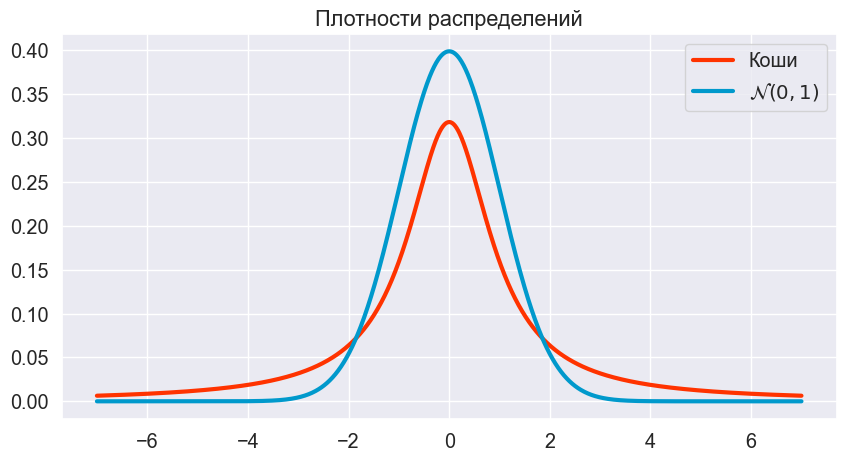

In [55]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [156]:
size = 30
samples_count = 100000
sample = sps.norm.rvs(size=(samples_count, size))

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

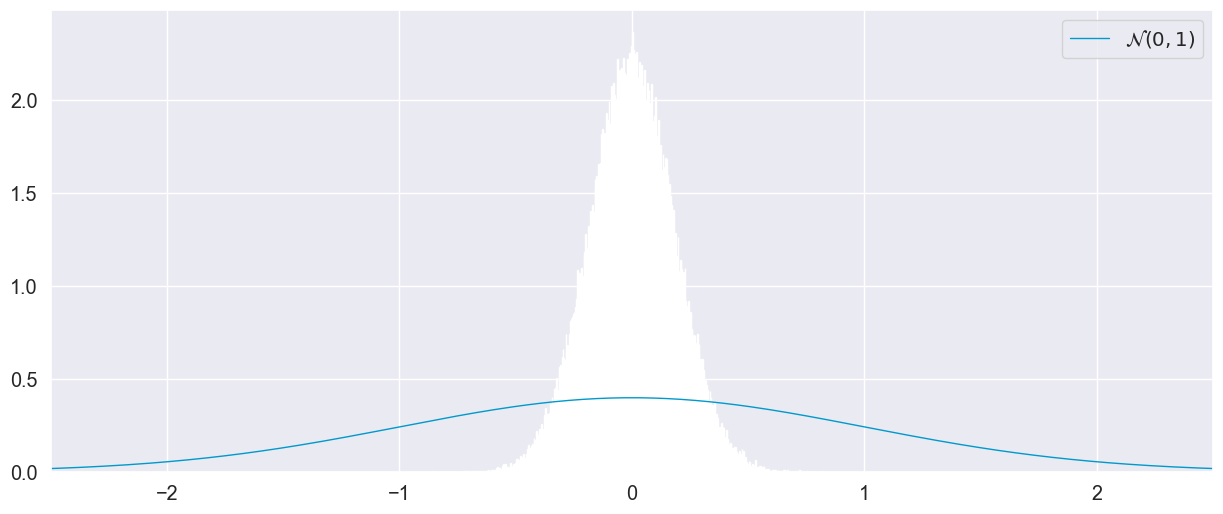

In [162]:
grid = np.linspace(-10, 10, 1000)
plt.figure(figsize=(15, 6))
plt.hist(sorted(sample.mean(axis = 1))[0:100000],density = True, bins=500);
plt.plot(grid, sps.norm.pdf(grid), color=blue, label='$\mathcal{N}(0, 1)$', lw=1);
plt.xlim((-2.5,2.5))
plt.legend();

**Вывод:** не получилось сделать гистограмму отнормированной

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [58]:
size = 30
samples_count = 100000

sample = sps.cauchy.rvs(size=(samples_count, size))

Построим аналогичный график. 

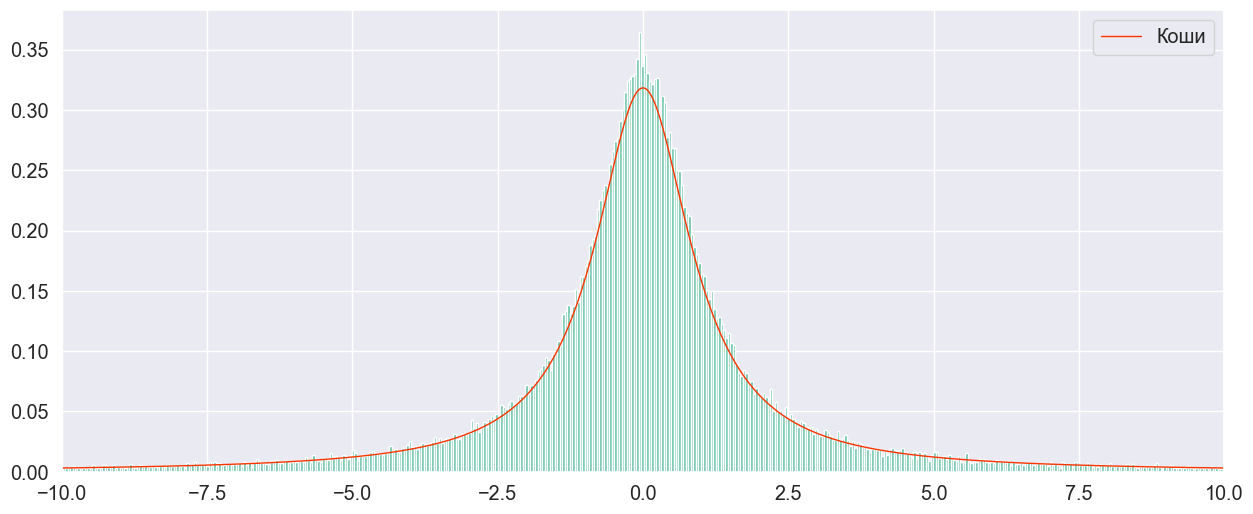

In [59]:
grid = np.linspace(-20, 20, 1000)
plt.figure(figsize=(15, 6))
plt.hist(sorted(sample.mean(axis = 1))[3000:97000],density = True, bins=500);
plt.xlim((-10,10))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=1);
plt.legend();

Я отсортировал и убрал слишком большие и маленькие величины, чтобы гистограмма нормально выглядела

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**


### <b><font color="orange">Сложная часть</font></b>

## Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения $U[0, \theta]$.


1. Постройте асимптотический доверительный интервал для $\theta$, используя асимптотически нормальную оценку $\theta$.

$\hat{\theta} = 2\overline{X}$


In [276]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    s2 = np.var(sample)
    
    left   = sample.mean() - sps.uniform(loc=0, scale=2*sample.mean()).ppf(alpha)/np.sqrt(sample.shape[0])*np.sqrt(s2)
    right  = sample.mean() + sps.uniform(loc=0, scale=2*sample.mean()).ppf(alpha)/np.sqrt(sample.shape[0])*np.sqrt(s2)
    return np.array([left, right])

**Ответ:**

2. Постройте точный доверительный интервал для $\theta$, используя статистику $X_{(n)}$.

    - Найдите функцию распредления $X_{(n)}$ по определению. 
    - Точный доверительный интервал для $\theta$ имеет смысл строить в виде $(X_{(n)}, X_{(n)} + c_{\alpha})$ (поясните почему). 
    - Нужно найти такое $c_{\alpha}$, что $\mathsf{P_{\theta}}(\theta \in (X_{(n)}, X_{(n)} + c_{\alpha})) = \alpha$ 

**Ответ:**$\newline$
1)$F_{X_{(n)}}(x) = P(X_{(n)} < x)$, тогда получается x больше любого элемента реализации выборки.$\newline$
Тогда: $F_{X_{(n)}}(x) = P(X_{1}<x)\cdot P(X_{2}<x)\cdot ...\cdot P(X_{n}<x) = (F_{U[0,\theta]}(x))^{n} = (sum(I_{\{X_{i}<x\}}))^{n} $$\newline$
2)$\theta$ не может быть меньше чем $X_{(n)}$, так как при значениях больше тетта плотность вероятности равнна нулю, т.е. никакой X там не мог реализоваться$\newline$
3)


Визуализируйте интервалы. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

In [ ]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    
    
    # ваш код

**Решение:**

In [ ]:
# ваш код

**Вывод:**


## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

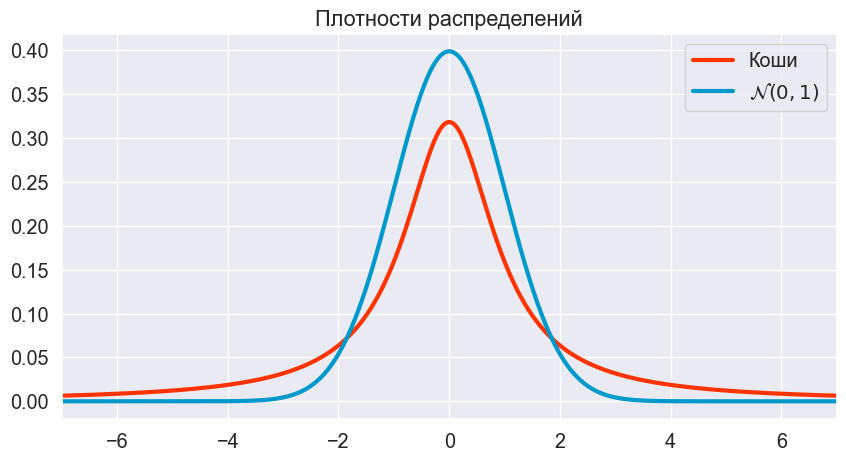

In [277]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();
plt.xlim((-7,7));

**Вывод:** Коши имеет более тяжелые хвосты

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

$\sigma_{\alpha}^2 = \frac{2}{(1-2\alpha)^{2}}\cdot [\alpha U_{1-\alpha}^{2} +\int_{0}^{U_{1-\alpha}}x^{2}p_{0}(x)dx]$

**Решение:**

C:\Users\AsusPro\AppData\Local\Temp\ipykernel_10844\696433346.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  sig2 = 2/(1-2*a)**2*(a*(sps.cauchy.ppf(1-a))**2+sc.integrate.quad(lambda x: x**2*sps.cauchy.pdf(x), 0, sps.cauchy.ppf(1-a.all()))[0])
C:\Users\AsusPro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


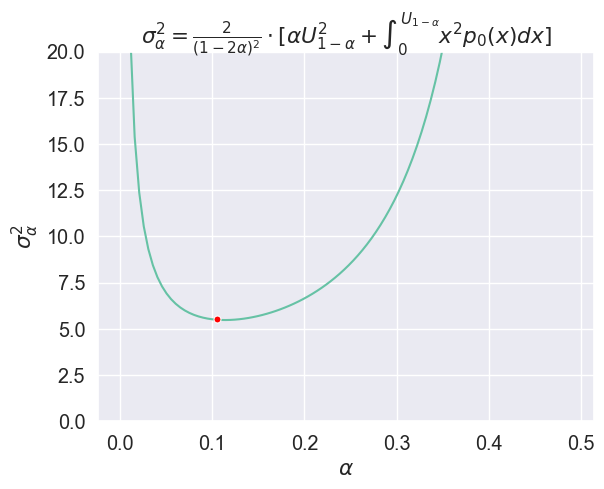

In [371]:
a = np.linspace(0.001,0.490,100)
sig2 = 2/(1-2*a)**2*(a*(sps.cauchy.ppf(1-a))**2+sc.integrate.quad(lambda x: x**2*sps.cauchy.pdf(x), 0, sps.cauchy.ppf(1-a.all()))[0])
plt.plot(a,sig2)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma_{\alpha}^2$')
plt.title(r'$\sigma_{\alpha}^2 = \frac{2}{(1-2\alpha)^{2}}\cdot [\alpha U_{1-\alpha}^{2} +\int_{0}^{U_{1-\alpha}}x^{2}p_{0}(x)dx]$')
plt.ylim((0,20))
sns.lineplot([0.105], [5.55], marker='o', markersize=5, color='r');

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:**$\alpha = 0.105, \sigma_{\alpha}^2 = 5.55$

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:** a = 0.105, $MSE_{\widehat{\theta}}(0) = \widehat{\theta}^2$

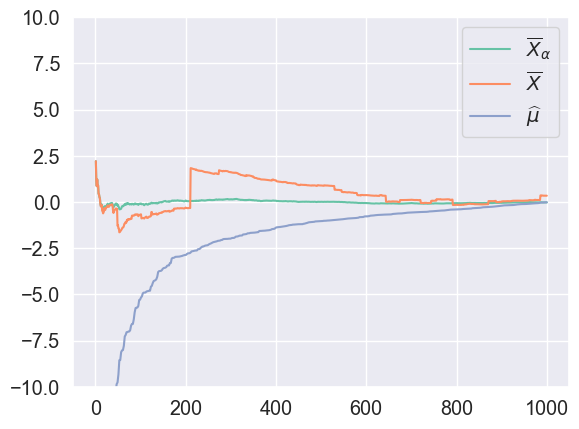

In [477]:
sample = sps.cauchy.rvs(size = 1000)
a = 0.105
n = np.array(np.arange(1,1001,1))
k = np.array(np.round(n*a).astype(int))
x_mean = np.cumsum(sample)/n
x_trim = np.zeros(1000)
mu = np.zeros(1000)
for i in range(1, 1001):
    x_trim[i-1] = sps.trim_mean(sample[:i], a)# я хотел сделать по-нормальному через sample[:n],
                                              # но компилятор долго ругался, поэтому решил через цикл
    if (i % 2 == 0):
        mu[i-1] = (np.sort(sample)[int(i/2)]+np.sort(sample)[int(i/2)+1])/2
    else:
        mu[i-1] = np.sort(sample)[int((i-1)/2)+1]
plt.plot(n,x_trim, label = r'$\overline{X}_{\alpha}$')
plt.plot(n,x_mean, label = r'$\overline{X}$')
plt.plot(n,mu, label = r'$\widehat{\mu}$')
plt.legend()
plt.ylim((-10,10));

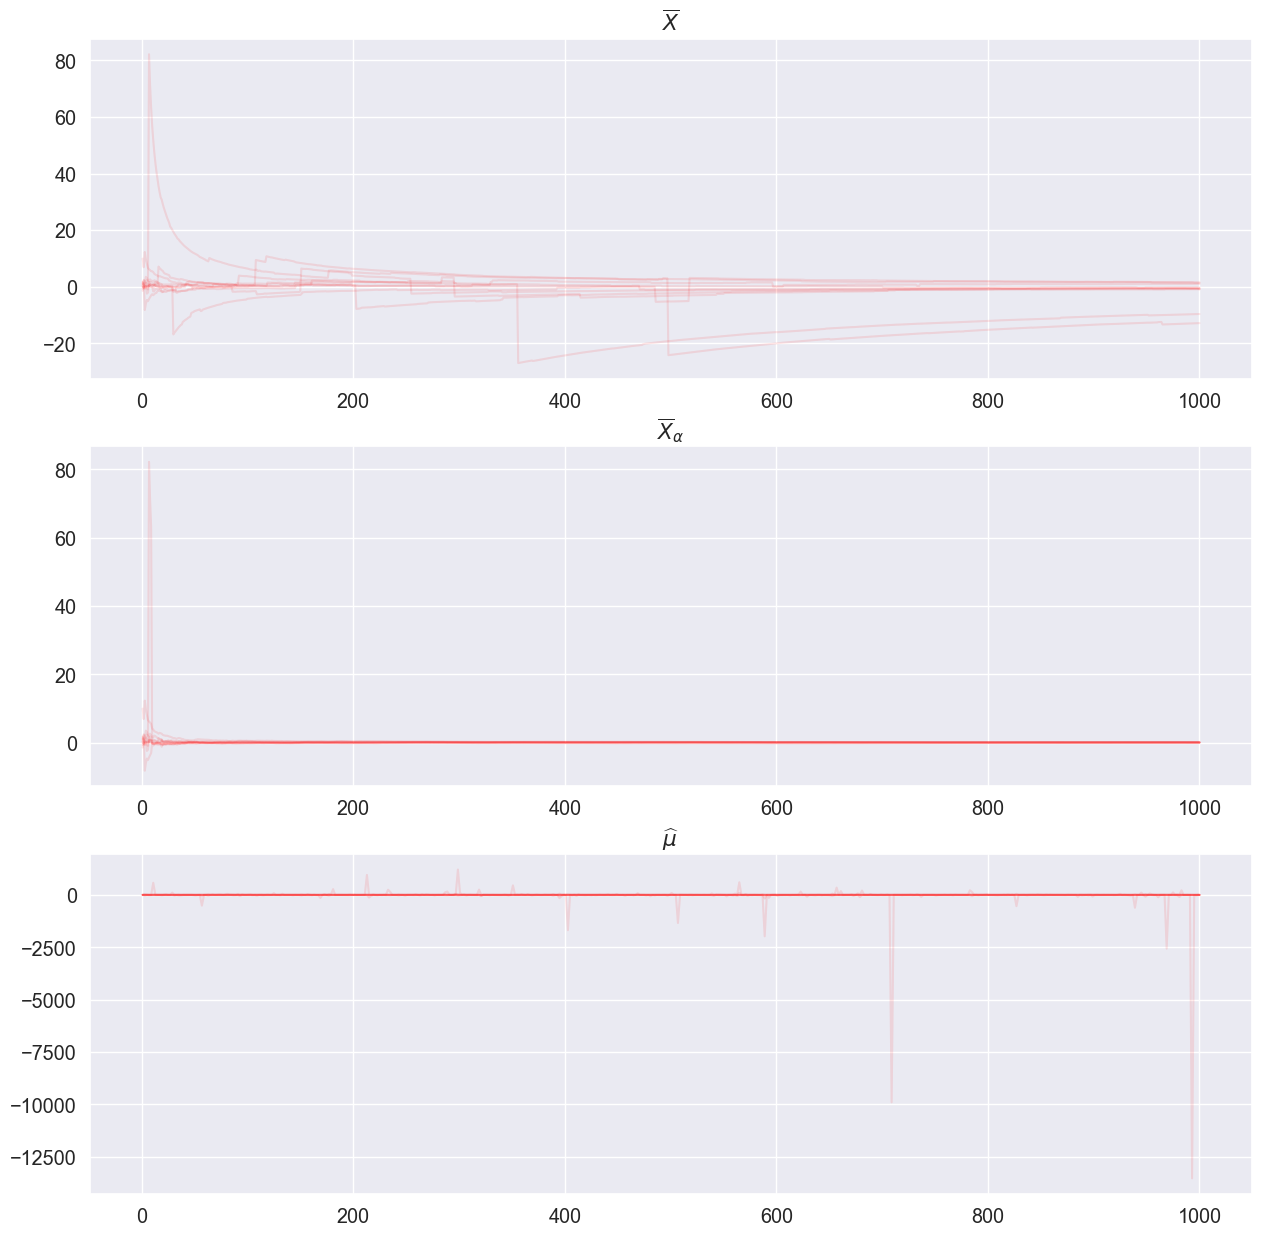

In [512]:
sample = sps.cauchy.rvs(size = (1000,10))
a = 0.105
n = np.array(np.arange(1,1001,1))
n0 = n
for i in range(9):
    n =np.vstack((n, n0))
n = n.T
k = np.array(np.round(n*a).astype(int))
x_mean = np.cumsum(sample, axis = 0)/n
x_trim = np.zeros((1000,10))
mu = np.zeros((1000,10))
for i in range(1, 1001):
    x_trim[i-1] = sps.trim_mean(sample[:i], a)
    if (i % 2 == 0):
        mu[i-1] = (np.sort(sample)[int(i/2)]+np.sort(sample)[int(i/2)+1])/2
    else:
        mu[i-1] = np.sort(sample)[int((i-1)/2)+1]

f,ax = plt.subplots(3, figsize=(15, 15))
ax[0].plot(n,x_mean, color = 'r', alpha = 0.1)
ax[0].set_title(r'$\overline{X}$')
ax[1].plot(n,x_trim, color = 'r', alpha = 0.1)
ax[1].set_title(r'$\overline{X}_{\alpha}$')
ax[2].plot(n,mu, color = 'r', alpha = 0.1)
ax[2].set_title(r'$\widehat{\mu}$');

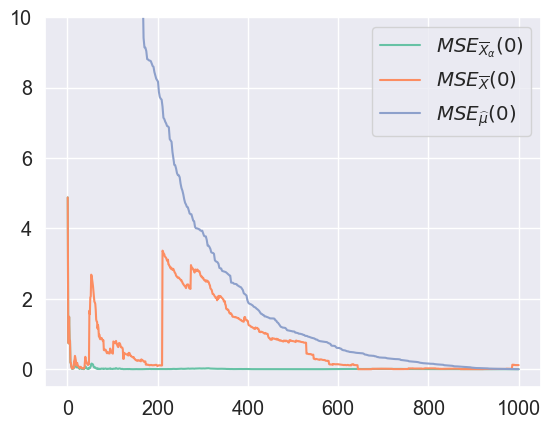

In [483]:
plt.plot(n,x_trim**2, label = r'$MSE_{\overline{X}_{\alpha}}(0)$')
plt.plot(n,x_mean**2, label = r'$MSE_{\overline{X}}(0)$')
plt.plot(n,mu**2, label = r'$MSE_{\widehat{\mu}}(0)$')
plt.ylim((-0.5,10));
plt.legend();

**Вывод:**
1) Для Коши оценка средним арифметическим плохая, что подтверждается теорией(для Коши нет мат. ожидания).$\newline$
2) Усеченое среднее является несмещеной и асимптотически нормальной. Она быстрее остальных сходится к реальному значению, что видно по графику MSE. Также у неё нет 'флуктуаций', так как слишком большие/малые значения, которых много из-за тяжелых хвостов распределения, она обрезает.$\newline$
3) Насчет медианы я ожидал, что она будет самой устойчивой к выбросам, ведь она фактически берет 1-2 центральных значения, а что там по краям твориться её не волнует. Но эксперимент показал противоположный результат.$\newline$